In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme("notebook")

In [2]:
bike_dataset = pd.read_csv("hour.csv")
bike_dataset.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_dataset.duplicated().sum()


np.int64(0)

In [4]:
bike_dataset.weekday.value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [5]:
bike_dataset.season.value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [6]:
bike_dataset.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour',
                                           'dteday':'datetime'
                                              })
print(bike_dataset.columns)

Index(['instant', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [8]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   datetime    17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
bike_dataset.to_csv("cleaned_df",index=False)

In [10]:
# bike_dataset['season'] = bike_dataset['season'].map({
#     1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
# }).astype('O')

# bike_dataset['weekday'] = bike_dataset['weekday'].map({
#     0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
#     4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
# }).astype('O')

bike_dataset['weather'] = bike_dataset['weather'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'
}).astype('O')

# bike_dataset['hour'] = bike_dataset['hour'].astype('O')
# bike_dataset['month'] = bike_dataset['month'].astype('O')
bike_dataset['year'] = bike_dataset['year'].astype("bool")
bike_dataset['holiday'] = bike_dataset['holiday'].map({1: True, 0: False})
bike_dataset['workingday'] = bike_dataset['workingday'].map({1: True, 0: False})
bike_dataset['datetime'] = pd.to_datetime(bike_dataset['datetime'])

In [11]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  bool          
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weather     17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [12]:
bike_dataset.describe()

,instant,datetime,season,month,hour,weekday,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,6.537775,11.546752,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,3.438776,6.914405,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
bike_dataset.drop(columns=["instant"],inplace=True)

In [14]:
print(len(bike_dataset.columns))


16


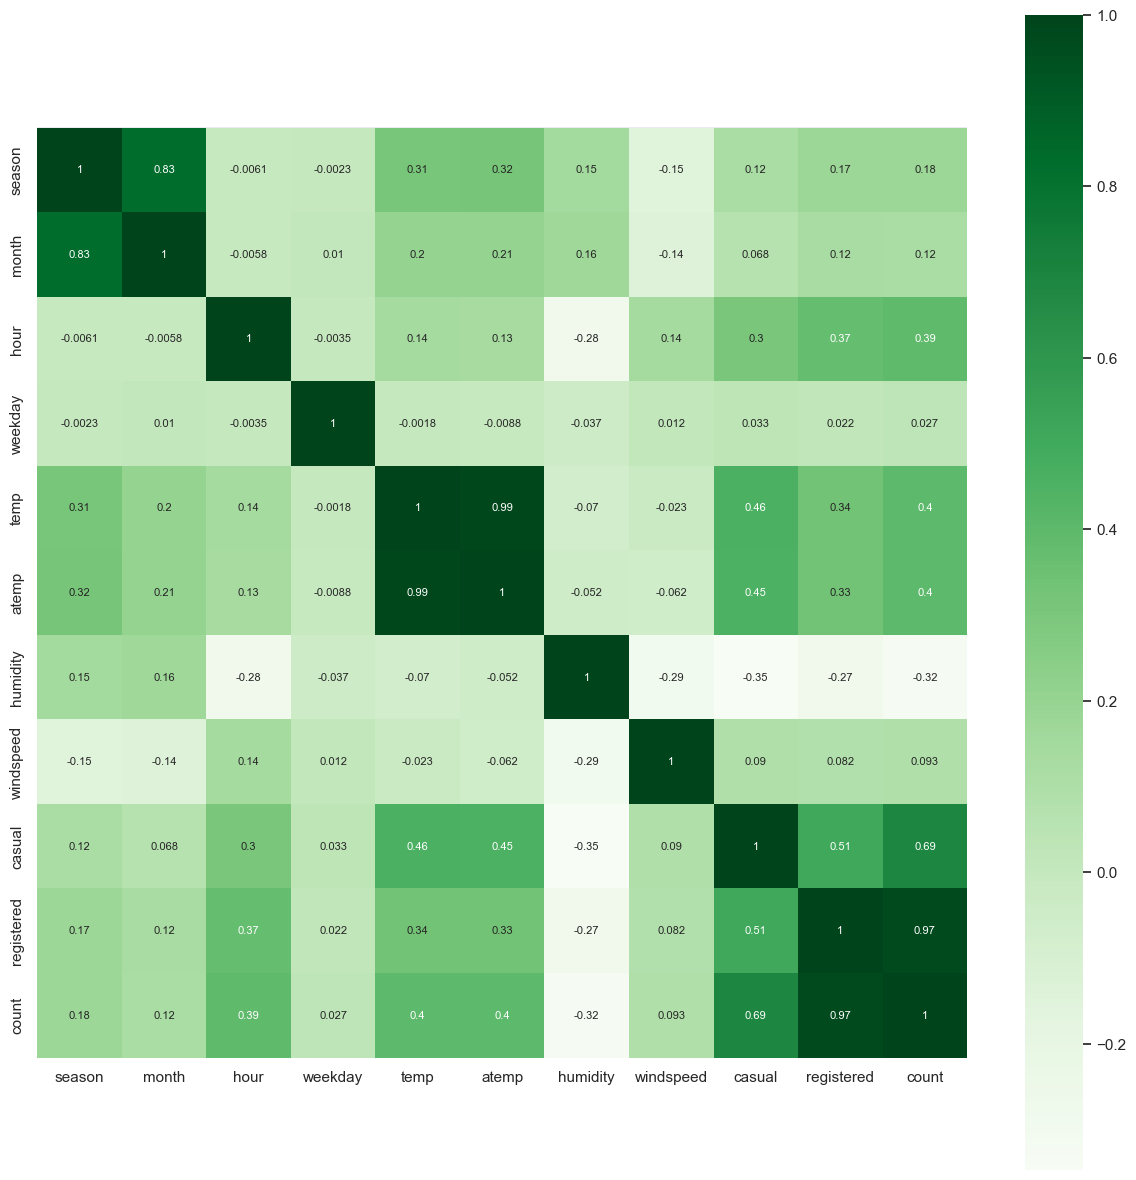

In [15]:
numeric_data = bike_dataset.select_dtypes(include=['int64', 'float64'])
correlation_values = numeric_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Greens')
plt.show() 


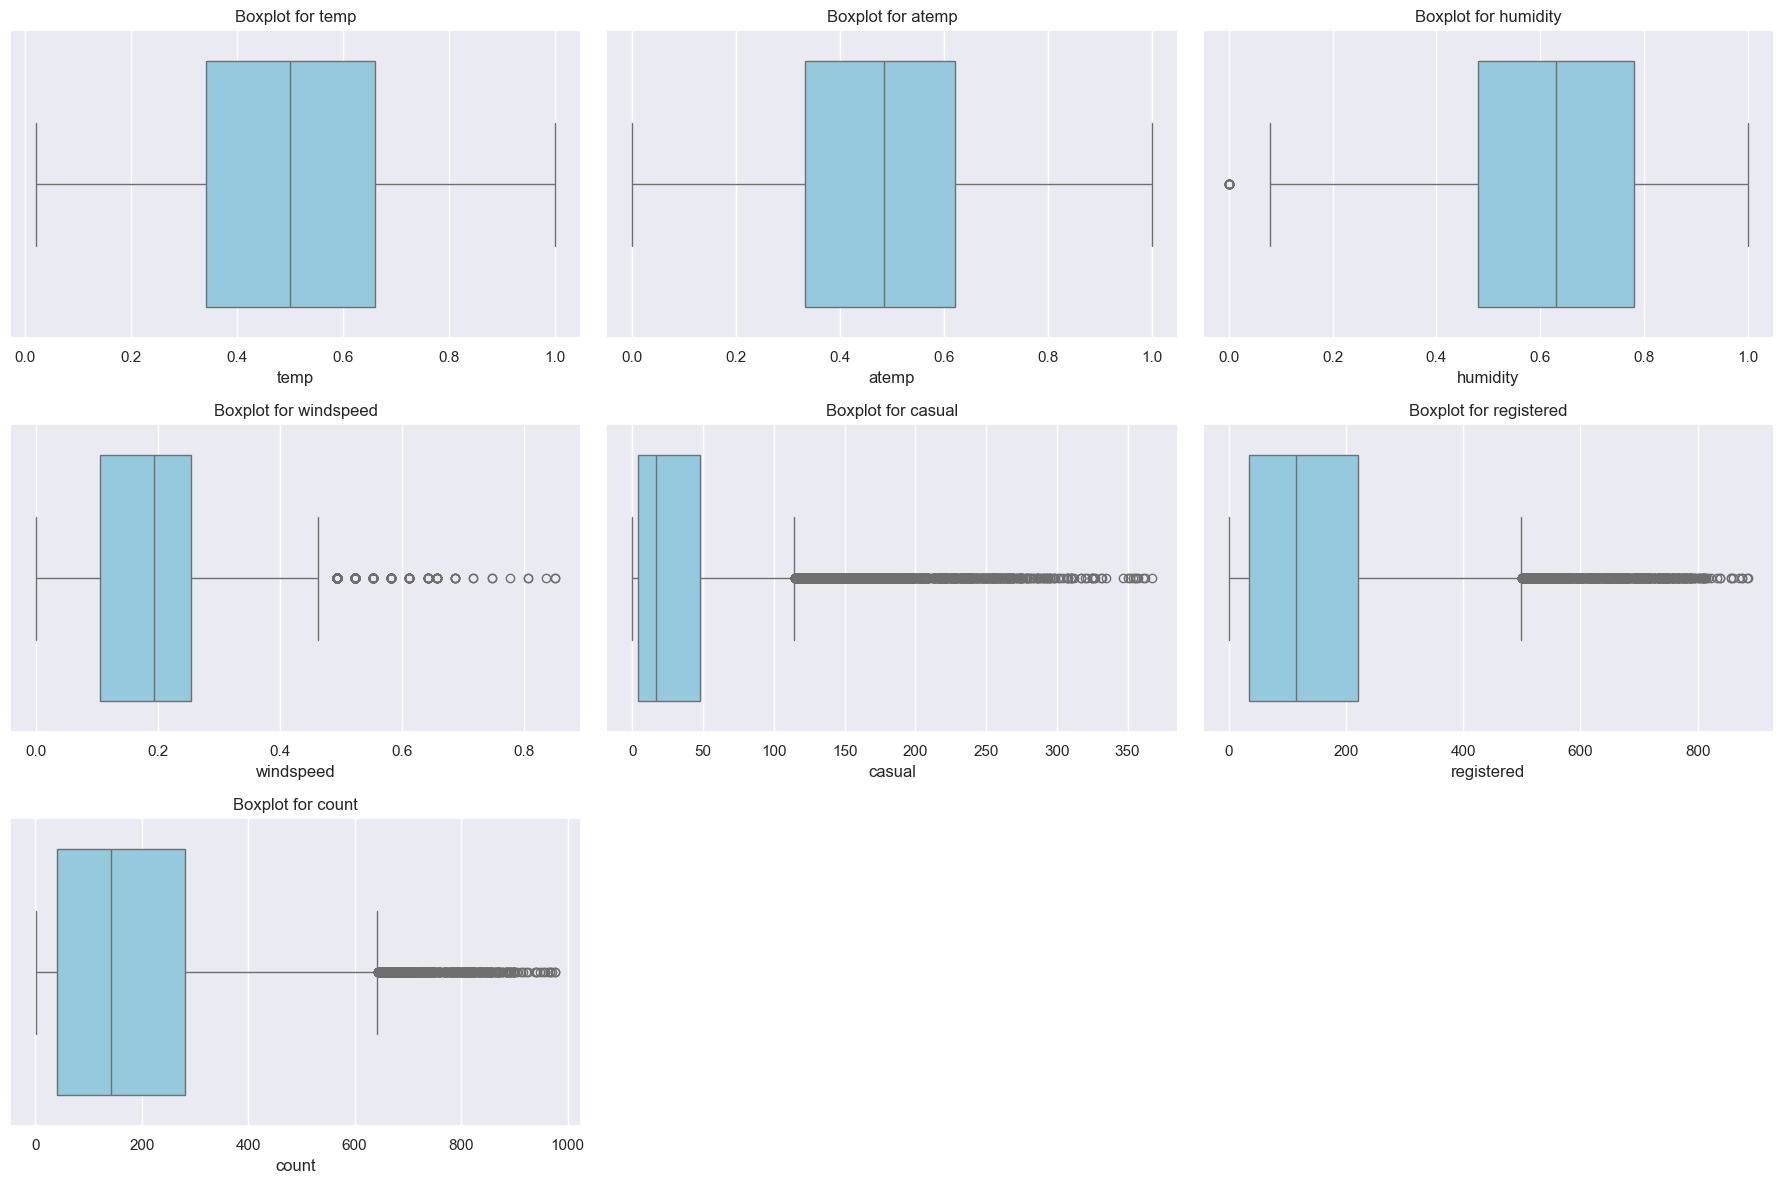

In [16]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_dataset[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [17]:
#check outlier
numeric_cols = bike_dataset.select_dtypes(include=['int64', 'float64']).columns
Q1 = bike_dataset['count'].quantile(0.10)
Q3 = bike_dataset['count'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike_dataset[(bike_dataset['count'] < lower_bound) | (bike_dataset['count'] > upper_bound)]
# outliers.style.background_gradient(cmap='Greys')

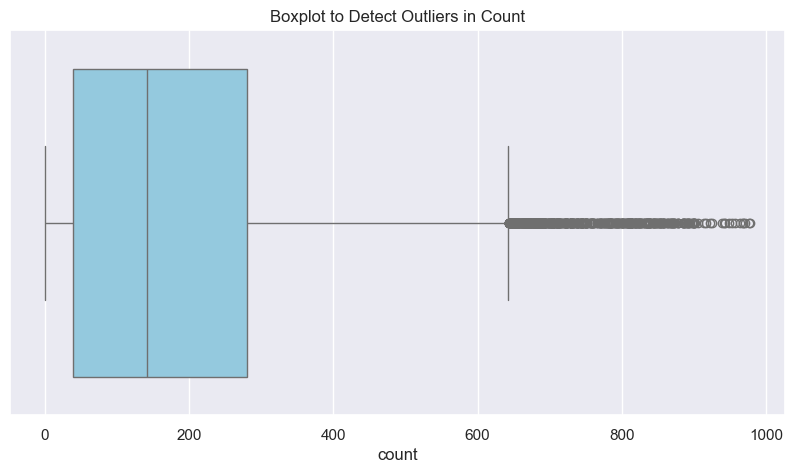

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['count'], color='skyblue')
plt.title('Boxplot to Detect Outliers in Count')
plt.xlabel('count')
plt.show()

In [19]:
#removing outliers
bike_dataset = bike_dataset[(bike_dataset['count'] >= lower_bound) & (bike_dataset['count'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)
#17,099 rows from ~17,379 → 280 rows removed

shape after outliers removal : (17367, 16)


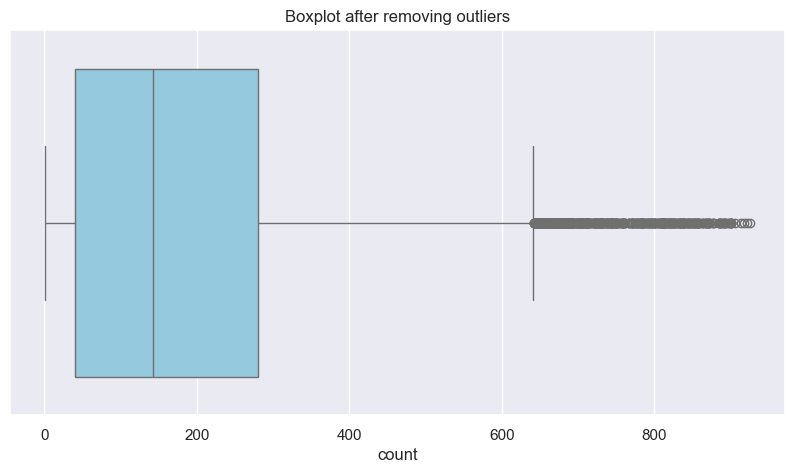

In [20]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['count'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('count')
 plt.show()

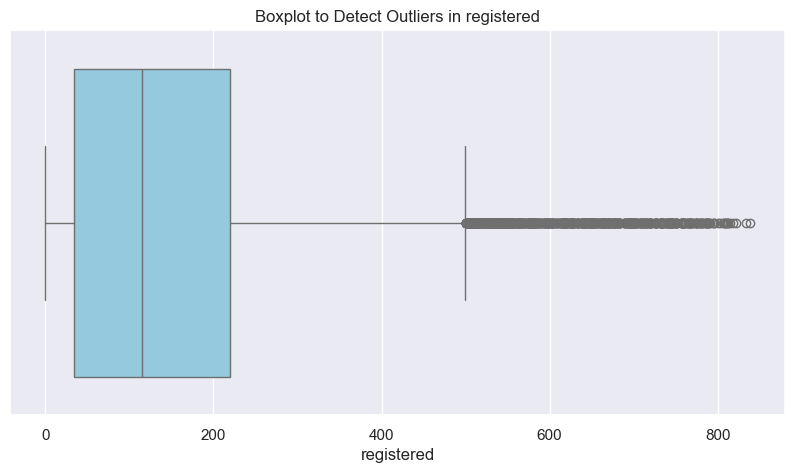

In [21]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in registered')
 plt.xlabel('registered')
 plt.show()

In [22]:

Q1 = bike_dataset['registered'].quantile(0.25)
Q3 = bike_dataset['registered'].quantile(0.80)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]


In [23]:
bike_dataset = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16930, 16)


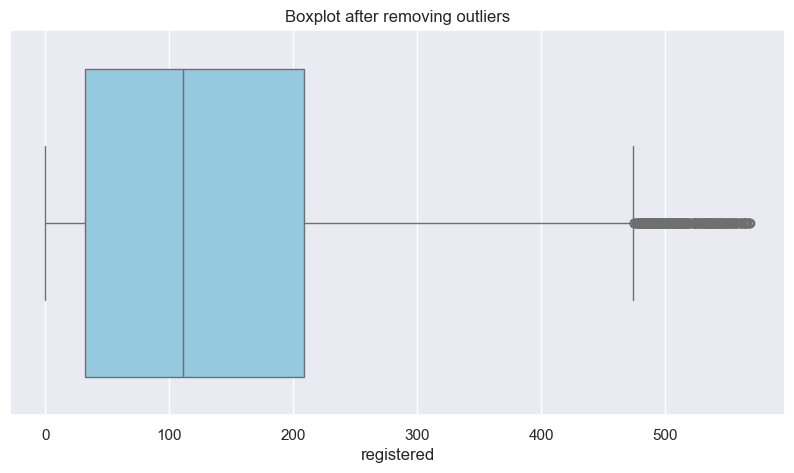

In [24]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('registered')
 plt.show()

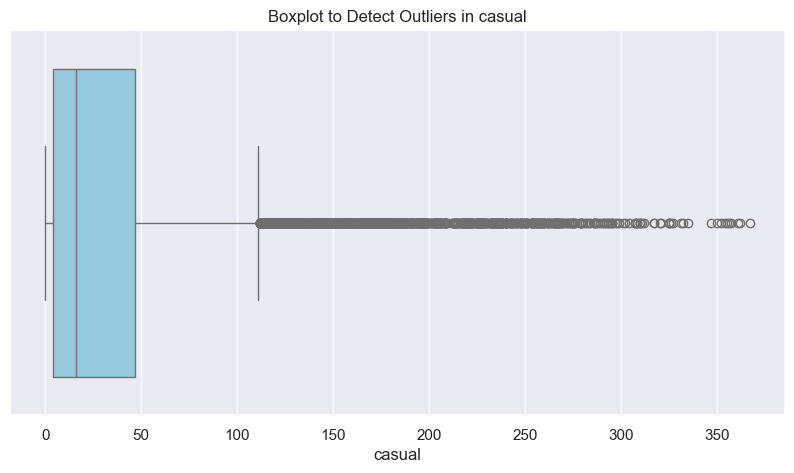

In [25]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in casual')
 plt.xlabel('casual')
 plt.show()

In [26]:
Q1 = bike_dataset['casual'].quantile(0.15)
Q3 = bike_dataset['casual'].quantile(0.85)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]


In [27]:
 bike_dataset = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]
 print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16364, 16)


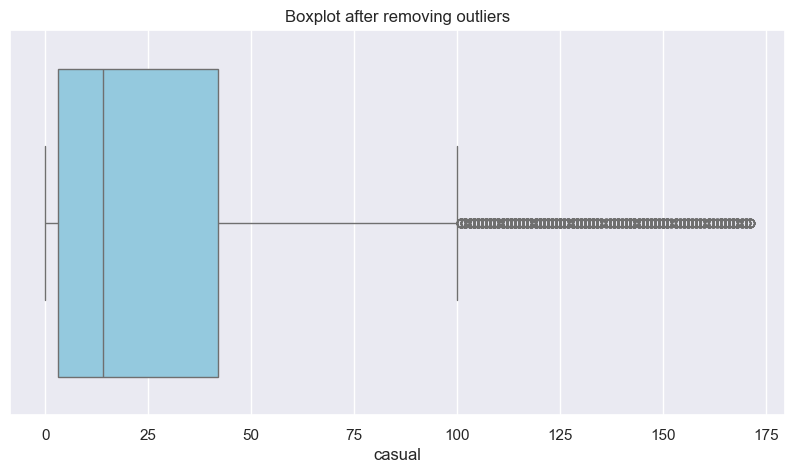

In [28]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('casual')
 plt.show()

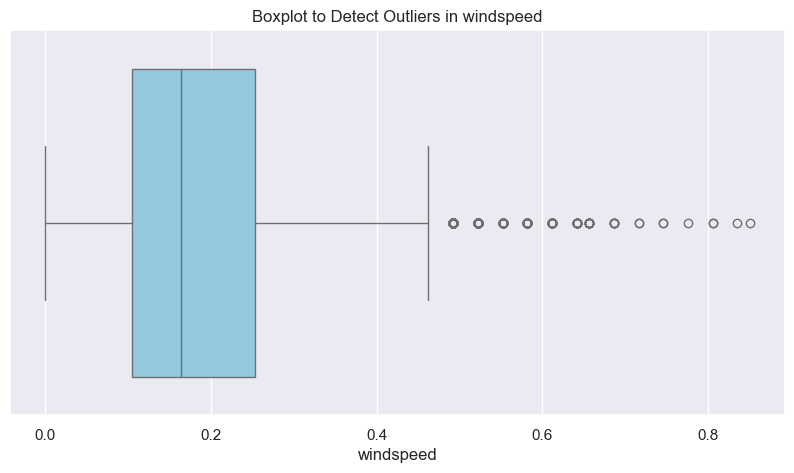

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
plt.title('Boxplot to Detect Outliers in windspeed')
plt.xlabel('windspeed')
plt.show()



In [30]:
def remove_outliers_iteratively(bike_dataset):
    prev_shape = None
    while prev_shape != bike_dataset.shape:
        prev_shape = bike_dataset.shape
        Q1 = bike_dataset['windspeed'].quantile(0.20)
        Q3 = bike_dataset['windspeed'].quantile(0.80)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bike_dataset = bike_dataset[
            (bike_dataset['windspeed'] >= lower) & 
            (bike_dataset['windspeed'] <= upper)
        ]
    return bike_dataset

In [31]:
bike_dataset = remove_outliers_iteratively(bike_dataset)
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16259, 16)


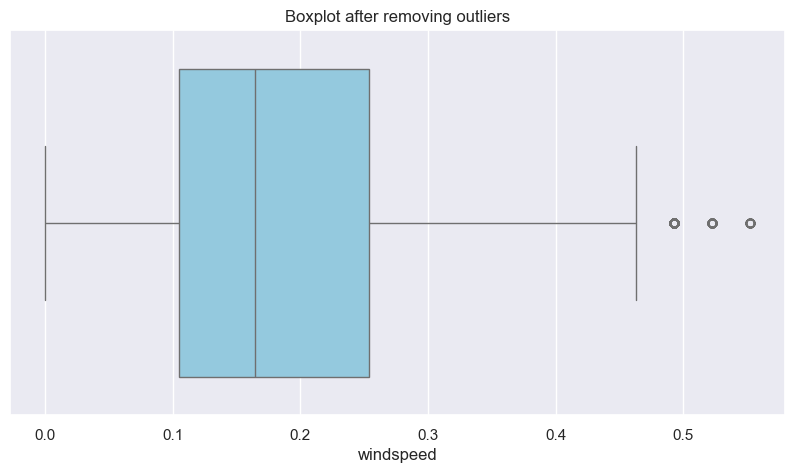

In [32]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('windspeed')
 plt.show()

In [33]:
# function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# create the new 'rush_hour' feature
bike_dataset['rush_hour'] = bike_dataset['hour'].apply(is_rush_hour)

bike_dataset.head().style.background_gradient(cmap='Greens')

,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rush_hour
0,2011-01-01 00:00:00,1,False,1,0,False,6,False,Clear,0.240000,0.287900,0.810000,0.000000,3,13,16,0
1,2011-01-01 00:00:00,1,False,1,1,False,6,False,Clear,0.220000,0.272700,0.800000,0.000000,8,32,40,0
2,2011-01-01 00:00:00,1,False,1,2,False,6,False,Clear,0.220000,0.272700,0.800000,0.000000,5,27,32,0
3,2011-01-01 00:00:00,1,False,1,3,False,6,False,Clear,0.240000,0.287900,0.750000,0.000000,3,10,13,0
4,2011-01-01 00:00:00,1,False,1,4,False,6,False,Clear,0.240000,0.287900,0.750000,0.000000,0,1,1,0


In [34]:
bike_dataset['rush_hour'] = bike_dataset['rush_hour'].map({0: True, 1: False})

In [35]:
x=bike_dataset.drop(columns=['casual','registered','count','datetime'],axis=1)
y = bike_dataset['count'].copy()

In [36]:
x

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,rush_hour
0,1,False,1,0,False,6,False,Clear,0.24,0.2879,0.81,0.0000,True
1,1,False,1,1,False,6,False,Clear,0.22,0.2727,0.80,0.0000,True
2,1,False,1,2,False,6,False,Clear,0.22,0.2727,0.80,0.0000,True
3,1,False,1,3,False,6,False,Clear,0.24,0.2879,0.75,0.0000,True
4,1,False,1,4,False,6,False,Clear,0.24,0.2879,0.75,0.0000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,True,12,19,False,1,True,Mist,0.26,0.2576,0.60,0.1642,False
17375,1,True,12,20,False,1,True,Mist,0.26,0.2576,0.60,0.1642,True
17376,1,True,12,21,False,1,True,Clear,0.26,0.2576,0.60,0.1642,True
17377,1,True,12,22,False,1,True,Clear,0.26,0.2727,0.56,0.1343,True


<Axes: xlabel='count', ylabel='Count'>

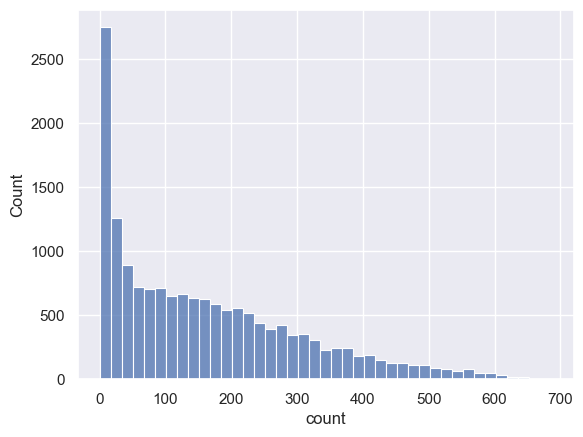

In [37]:
sns.histplot(x=y)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [40]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
num_cols=x.select_dtypes(exclude="O").columns.to_list()
cat_cols=x.select_dtypes(include="O").columns.to_list()


In [42]:

def prep( d=2):
    numerical_transformer = Pipeline(steps=[  
        ('poly', PolynomialFeatures(degree=d))])
    
    cat_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first'))])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num_prep', numerical_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
    
    return preprocessor



In [43]:
# numerical_transformer = Pipeline(steps=[  
# ('poly', PolynomialFeatures())])

# cat_transformer = Pipeline(steps=[
# ('encoder', OneHotEncoder(drop='first'))])

# preprocessor = ColumnTransformer(transformers=[
# ('num_prep', numerical_transformer, num_cols),
# ('cat', cat_transformer, cat_cols)])

# Ridge model
trying the model first, 
then applying gridsearch

In [44]:
from sklearn.linear_model import Ridge

r_reg= Ridge()

ridge_pipeline= Pipeline(steps=[("preprocessing",prep(2)),("ridge",Ridge())]) 
ridge_pipeline.fit(x_train,y_train)
print("Train Acc:",ridge_pipeline.score(x_train,y_train))
print("Test Acc:",ridge_pipeline.score(x_test,y_test))

Train Acc: 0.7417365110199041
Test Acc: 0.7527753913101367


In [45]:

import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=Warning)  # This will catch the LinAlgWarning


In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring = {'r2': 'r2',
'neg_mse': 'neg_mean_squared_error',
'neg_mae': 'neg_mean_absolute_error'
}


ridge_param_grid = {'preprocessing__num_prep__poly__degree': [1, 2, 3, 4],'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

ridge_gs = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring=scoring, refit='r2')

ridge_gs.fit(x_train, y_train)

print("best r2 score: ", ridge_gs.best_score_.round(3))
print("best neg_mse:", ridge_gs.cv_results_['mean_test_neg_mse'][ridge_gs.best_index_].round(3))
print("Best neg_mae:", ridge_gs.cv_results_['mean_test_neg_mae'][ridge_gs.best_index_].round(3))
print("best parameters: ", ridge_gs.best_params_)

best r2 score:  0.853
best neg_mse: -3064.529
Best neg_mae: -39.55
best parameters:  {'preprocessing__num_prep__poly__degree': 4, 'ridge__alpha': 1}


# XGboots gridsearch

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline([('preprocessing', prep()),('xgb', XGBRegressor(objective='reg:squarederror'))])


xgb_param_grid = {
    'xgb__objective': ['reg:squarederror', 'reg:absoluteerror'], 
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__alpha': [0.1, 1],  
    'xgb__lambda': [0.1, 1],  
    'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]  
}



xgb_gs = GridSearchCV(xgb_pipeline,xgb_param_grid,cv=5,scoring=scoring,refit='r2')

xgb_gs.fit(x_train, y_train)

best_model = xgb_gs.best_estimator_

print("best r2 score: ", xgb_gs.best_score_.round(3))
print("Best neg_mse:", xgb_gs.cv_results_['mean_test_neg_mse'][xgb_gs.best_index_].round(3))
print("Best negmae:", xgb_gs.cv_results_['mean_test_neg_mae'][xgb_gs.best_index_].round(3))
print("best parameters: ", xgb_gs.best_params_)

best r2 score:  0.924
Best neg_mse: -1576.798
Best negmae: -25.764
best parameters:  {'preprocessing__num_prep__poly__degree': 2, 'xgb__alpha': 1, 'xgb__lambda': 0.1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__objective': 'reg:squarederror'}


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline([('preprocessing', prep()), ('knn', KNeighborsRegressor())])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
    'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]
}

knn_gs = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring=scoring, refit='r2')
knn_gs.fit(x_train, y_train)

print("KNN best r2 score:", knn_gs.best_score_.round(3))
print("KNN best neg_mse:", knn_gs.cv_results_['mean_test_neg_mse'][knn_gs.best_index_].round(3))
print("KNN best neg_mae:", knn_gs.cv_results_['mean_test_neg_mae'][knn_gs.best_index_].round(3))
print("KNN best parameters:", knn_gs.best_params_)

KNN best r2 score: 0.888
KNN best neg_mse: -2335.963
KNN best neg_mae: -30.738
KNN best parameters: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance', 'preprocessing__num_prep__poly__degree': 1}


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


param_grid = {'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]}

linear_pipeline = Pipeline(steps=[('preprocessing', prep()),('linearregression', LinearRegression())])

lr_gs = GridSearchCV(linear_pipeline, param_grid, cv=5, scoring=scoring, refit='r2')

lr_gs.fit(x_train, y_train)

print("best r2 score: ", lr_gs.best_score_.round(3))
print("best parameters: ", lr_gs.best_params_)

best r2 score:  0.83
best parameters:  {'preprocessing__num_prep__poly__degree': 3}


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

svr_pipeline = Pipeline(steps=[("preprocessing", prep(2)),("svr", SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))])

svr_pipeline.fit(x_train, y_train)

y_pred_test_svr = svr_pipeline.predict(x_test)

print("SVR R2 (test):", round(r2_score(y_test, y_pred_test_svr), 3))
print("SVR MSE (test):", round(mean_squared_error(y_test, y_pred_test_svr), 3))
print("SVR MAE (test):", round(mean_absolute_error(y_test, y_pred_test_svr), 3))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[('preprocessing', prep()),('randomforestregressor', RandomForestRegressor(random_state=42,n_estimators=100))])
rf_pipeline.fit(x_train, y_train)

y_pred_test_rf= rf_pipeline.predict(x_test)
print("RF R2 (test):", r2_score(y_test, y_pred_test_rf).round(3))
print("RF MSE (test):", mean_squared_error(y_test, y_pred_test_rf).round(3))
print("RF MAE (test):", mean_absolute_error(y_test, y_pred_test_rf).round(3))

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor

scoring4 = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

models = {"Ridge": Ridge(),
          "linear_reg": LinearRegression(),
          "XGboost":XGBRegressor(),
          "decision_tree":DecisionTreeRegressor(),
          "hurber":HuberRegressor()}

param_grids = {
    'Ridge': {'ridge__alpha': [0.1, 1, 10],
              'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]},
    
    'linear_reg':{'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]},
    
    'XGboost': {'xgboost__objective': ['reg:squarederror', 'reg:absoluteerror'],
                'xgboost__max_depth': [3, 5],
                'xgboost__learning_rate': [0.05, 0.1],
                'xgboost__alpha': [0.1, 1],
                'xgboost__lambda': [0.1, 1],
                'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]},
    
    'decision_tree': {
        'decision_tree__max_depth': [3, 5, 10, None],
        'decision_tree__min_samples_split': [2, 5, 10],
        'decision_tree__min_samples_leaf': [1, 2, 4],
        'preprocessing__num_prep__poly__degree': [1, 2, 3, 4]
    },

    'svr': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.2, 0.5], 'svr__kernel': ['linear', 'rbf']},
    'knn': {'knn__n_neighbors': [3, 5, 7, 10], 'knn__weights': ['uniform', 'distance'], 'knn__metric': ['minkowski', 'euclidean']}
}



for name, model in models.items():
    new_full_pipeline = Pipeline(steps=[("preprocessing", prep()),(name.lower(), model)])
   
    
    
    all_gs = GridSearchCV(new_full_pipeline, param_grids[name], cv=5,scoring=scoring4,refit='r2')
    all_gs.fit(x_train, y_train)
    
    print(print(name, "best r2 score =", all_gs.best_score_))
    print(name, "r2 train score =", all_gs.score(x_train, y_train))
    print(name, "r2 test score =", all_gs.score(x_test, y_test))
    print("bbest neg_mse:", all_gs.cv_results_['mean_test_neg_mse'][all_gs.best_index_].round(3))
    print("best neg_mae:", all_gs.cv_results_['mean_test_neg_mae'][all_gs.best_index_].round(3))
    print(name, "best parameters =", all_gs.best_params_)
    print("*"*50)
  
    